In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score

In [3]:
hipc_df = pd.read_csv("./Data/hipc_df.csv")
N = len(hipc_df)
labels = hipc_df['Label'].to_numpy()
patient_labels =  hipc_df['Patient'].to_numpy()
labs_labels = hipc_df["Lab"].to_numpy()

# Silhouette scores

In [4]:
for K in [16,32,64,128,256, 512] :
    lin_fsom = np.load("./Results/linW2/linW2_W2bary_flowsom_K"+str(K)+".npy")
    lin_kmeans = np.load("./Results/linW2/linW2_W2bary_Kmeans_K"+str(K)+".npy")
    print("For K = ",K, "silhouette score for Lin KMeans : ", 
          np.round(silhouette_score(lin_kmeans, patient_labels),2),
           " and for lin FlowSOM : ",
           np.round(silhouette_score(lin_fsom, patient_labels),2))

For K =  16 silhouette score for Lin KMeans :  0.51  and for lin FlowSOM :  0.5
For K =  32 silhouette score for Lin KMeans :  0.42  and for lin FlowSOM :  0.39
For K =  64 silhouette score for Lin KMeans :  0.35  and for lin FlowSOM :  0.35
For K =  128 silhouette score for Lin KMeans :  0.31  and for lin FlowSOM :  0.32
For K =  256 silhouette score for Lin KMeans :  0.28  and for lin FlowSOM :  0.29
For K =  512 silhouette score for Lin KMeans :  0.27  and for lin FlowSOM :  0.28


In [5]:
for K in [16,32,64,128,256, 512] :
    lin_fsom = np.load("./Results/PCA/pca_linW2_W2bary_flowsom_K"+str(K)+".npy")
    lin_kmeans = np.load("./Results/PCA/pca_linW2_W2bary_Kmeans_K"+str(K)+".npy")
    print("For K = ",K, "silhouette score for Lin KMeans : ", 
          np.round(silhouette_score(lin_kmeans, patient_labels),2),
           " and for lin FlowSOM : ",
           np.round(silhouette_score(lin_fsom, patient_labels),2))

For K =  16 silhouette score for Lin KMeans :  0.82  and for lin FlowSOM :  0.78
For K =  32 silhouette score for Lin KMeans :  0.84  and for lin FlowSOM :  0.77
For K =  64 silhouette score for Lin KMeans :  0.8  and for lin FlowSOM :  0.79
For K =  128 silhouette score for Lin KMeans :  0.83  and for lin FlowSOM :  0.81
For K =  256 silhouette score for Lin KMeans :  0.71  and for lin FlowSOM :  0.73
For K =  512 silhouette score for Lin KMeans :  0.62  and for lin FlowSOM :  0.66


# PCA

In [6]:
labs = ["W2", "D54", "FTV", "IU", "O0", "pw", "pM"]
markers = ['.', '^', '<', 's', '*', 'P', 'd']

patient1 = mpatches.Patch(color='blue', label='Patient 1')
patient2 = mpatches.Patch(color='red', label='Patient 2')
patient3 = mpatches.Patch(color='green', label='Patient 3')
handles = [patient1, patient2, patient3]
for i in range(len(markers)) :
    handles.append(Line2D([0], [0], label=labs[i], marker=markers[i], markersize=10,  linestyle=''))

colors_dict={"1" : 'blue',
"2" : 'red', 
"3" : 'green'}

markers_dict = dict(zip(labs, markers))

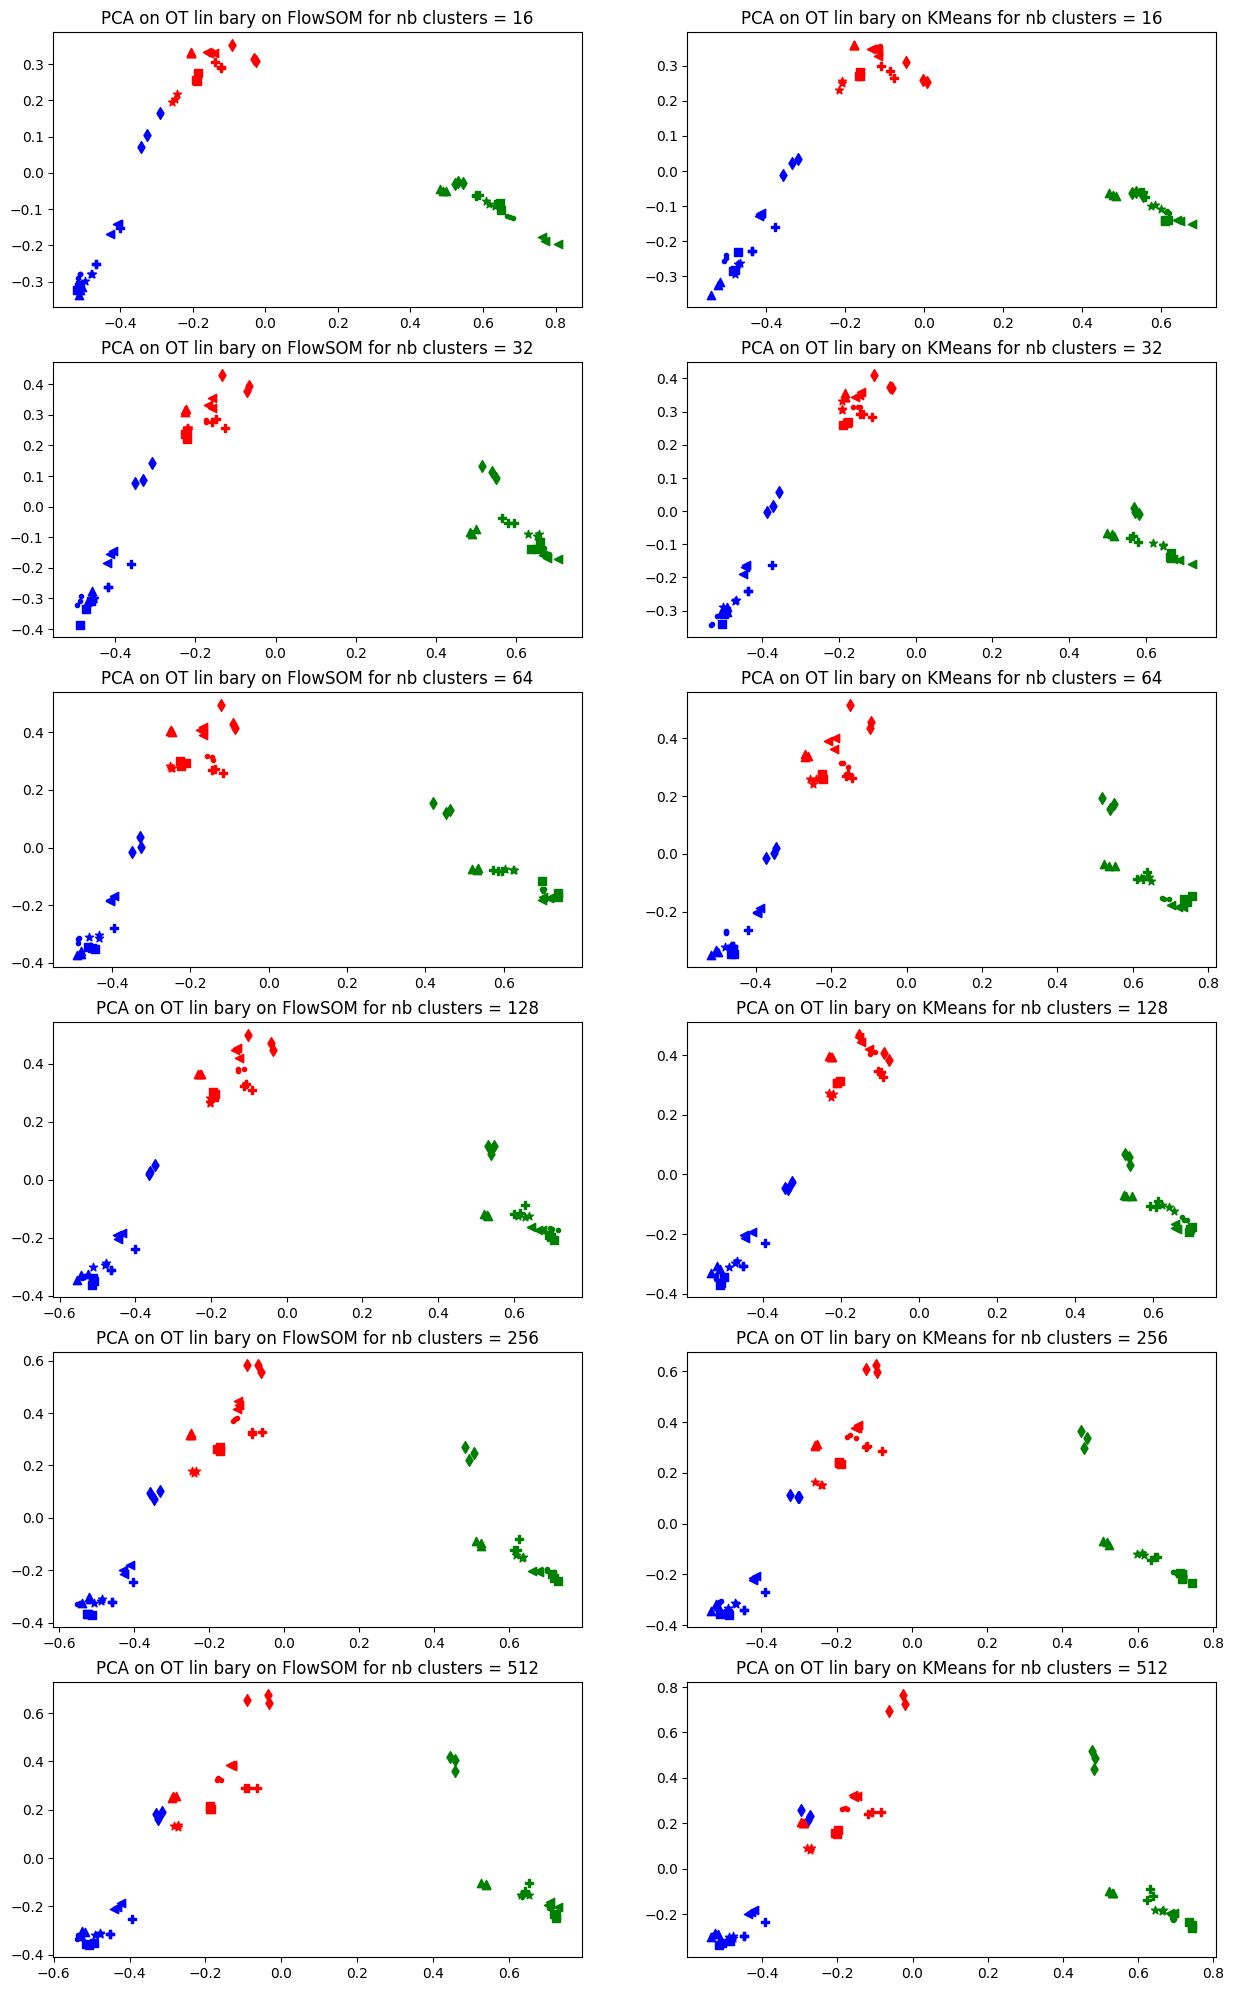

In [7]:
fig, ax = plt.subplots(figsize=(15,25), nrows = 6, ncols = 2)

for k,K in enumerate([16,32,64,128,256, 512]) :
    pca_lin_fsom = np.load("./Results/PCA/pca_linW2_W2bary_flowsom_K"+str(K)+".npy")
    pca_lin_kmeans = np.load("./Results/PCA/pca_linW2_W2bary_Kmeans_K"+str(K)+".npy")
    for i in range(N) :
        ax[k][0].scatter(pca_lin_fsom[i,0], pca_lin_fsom[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
        ax[k][1].scatter(pca_lin_kmeans[i,0], pca_lin_kmeans[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
       
    ax[k][0].set_title("PCA on OT lin bary on FlowSOM for nb clusters = "+str(K))
    ax[k][1].set_title("PCA on OT lin bary on KMeans for nb clusters = "+str(K))